In [6]:
import numpy as np
import tensorflow as tf
#import keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [7]:
low_image = np.load('coarse.npy')
low_image.shape

(10950, 11, 12)

In [8]:
high_image = np.load('observed.npy')
high_image.shape

(10950, 80, 120)

In [9]:

# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = 'highimg/'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '10949.png':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        #img= np.flip(img,1)
        high_img.append(img_to_array(img))


low_img = []
path = 'lowimg/'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
     if i == '10949.png':
        break
     else: 
        img = cv2.imread(path + '/'+i,1)

        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        #img= np.flip(img,1)
        low_img.append(img_to_array(img))

100%|█████████▉| 10949/10951 [07:47<00:00, 23.42it/s]


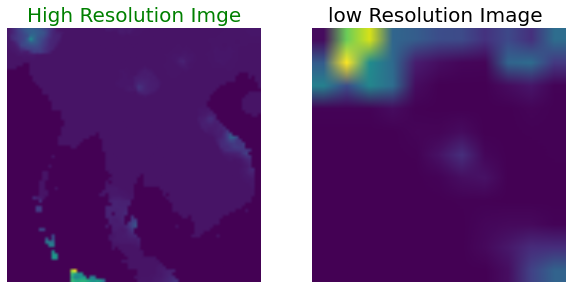

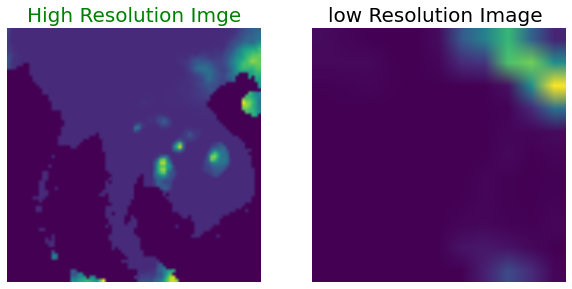

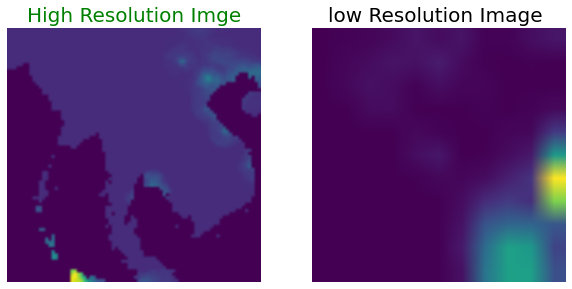

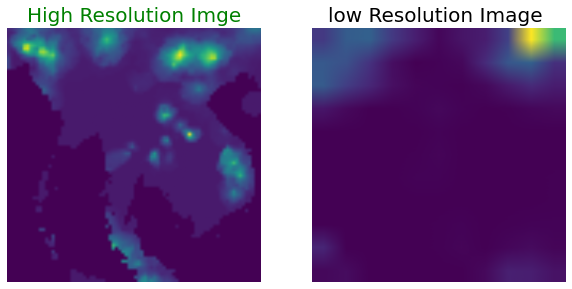

In [11]:
for i in range(4):
    a = np.random.randint(0,100)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [12]:
import random

m=high_image.shape[0]
idx= np.arange(0, m)
random.shuffle(idx)

train_idx= idx[0: int(m*0.7)]
valid_idx= idx[len(train_idx): int(m*0.9)]
test_idx= idx[len(train_idx)+len(valid_idx):]

print(len(train_idx), len(valid_idx), len(test_idx))
high_img=high_img #reshape(80, 80, 10950)
low_img=low_img#.reshape(11,11, 10950)

7664 2191 1095


In [ ]:
train_high_image = high_img[:len(train_idx)]
train_low_image = low_img[:len(train_idx)]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[len(train_idx): int(m*0.9)]
validation_low_image = low_img[len(train_idx): int(m*0.9)]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[len(train_idx)+len(valid_idx): ]
test_low_image = low_img[len(train_idx)+len(valid_idx):]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",len(train_high_image))
print("Shape of test images:",len(test_low_image))
print("Shape of validation images:",len(validation_high_image))